# データとライブラリの読み込み

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
%matplotlib inline

#input data
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 各カラムの確認

## Survived

In [ ]:
train_data['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

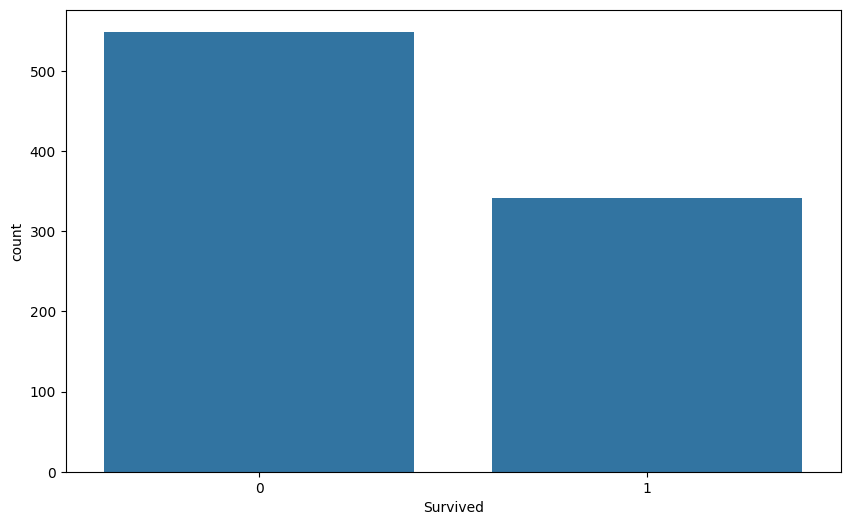

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Survived', data=train_data)
plt.show()

## Pclass

In [ ]:
train_data['Survived'].groupby(train_data['Pclass']).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<Axes: xlabel='Pclass', ylabel='count'>

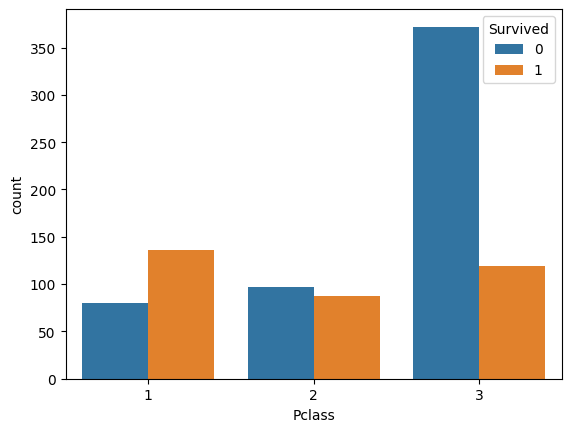

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=train_data)

## Name

In [ ]:
train_data['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [ ]:
train_data['Name_Status'] = train_data['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
train_data['Name_Status'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
the            1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: Name_Status, dtype: int64

## Name_Status（肩書き）

In [ ]:
train_data['Survived'].groupby(train_data['Name_Status']).mean()

Name_Status
Capt.        0.000000
Col.         0.500000
Don.         0.000000
Dr.          0.428571
Jonkheer.    0.000000
Lady.        1.000000
Major.       0.500000
Master.      0.575000
Miss.        0.697802
Mlle.        1.000000
Mme.         1.000000
Mr.          0.156673
Mrs.         0.792000
Ms.          1.000000
Rev.         0.000000
Sir.         1.000000
the          1.000000
Name: Survived, dtype: float64

In [ ]:
train_data['Name_Len'] = train_data['Name'].apply(lambda x: len(x))
train_data['Survived'].groupby(pd.qcut(train_data['Name_Len'],5)).mean()

Name_Len
(11.999, 19.0]    0.220588
(19.0, 23.0]      0.301282
(23.0, 27.0]      0.319797
(27.0, 32.0]      0.442424
(32.0, 82.0]      0.674556
Name: Survived, dtype: float64

In [ ]:
pd.qcut(train_data['Name_Len'],5).value_counts()

(11.999, 19.0]    204
(23.0, 27.0]      197
(32.0, 82.0]      169
(27.0, 32.0]      165
(19.0, 23.0]      156
Name: Name_Len, dtype: int64

## Sex

In [ ]:
train_data['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [ ]:
train_data['Survived'].groupby(train_data['Sex']).mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

## Age

In [ ]:
train_data['Survived'].groupby(pd.qcut(train_data['Age'],5)).mean()

Age
(0.419, 19.0]    0.481707
(19.0, 25.0]     0.328467
(25.0, 31.8]     0.393701
(31.8, 41.0]     0.437500
(41.0, 80.0]     0.373239
Name: Survived, dtype: float64

In [ ]:
pd.qcut(train_data['Age'],5).value_counts()

(0.419, 19.0]    164
(31.8, 41.0]     144
(41.0, 80.0]     142
(19.0, 25.0]     137
(25.0, 31.8]     127
Name: Age, dtype: int64

## SibSp

In [ ]:
train_data['Survived'].groupby(train_data['SibSp']).mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

## Parch

In [ ]:
train_data['Survived'].groupby(train_data['Parch']).mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

## Ticket

In [ ]:
train_data['Ticket_Len'] = train_data['Ticket'].apply(lambda x: len(x))
train_data['Ticket_Len'].value_counts()

6     419
5     131
4     101
8      76
10     41
7      27
9      26
17     14
16     11
13     10
12     10
15      9
11      8
18      6
3       2
Name: Ticket_Len, dtype: int64

In [ ]:
train_data['Ticket_Lett'] = train_data['Ticket'].apply(lambda x: str(x)[0])
train_data['Ticket_Lett'].value_counts()

3    301
2    183
1    146
P     65
S     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: Ticket_Lett, dtype: int64

In [ ]:
train_data.groupby(['Ticket_Lett'])['Survived'].mean()

Ticket_Lett
1    0.630137
2    0.464481
3    0.239203
4    0.200000
5    0.000000
6    0.166667
7    0.111111
8    0.000000
9    1.000000
A    0.068966
C    0.340426
F    0.571429
L    0.250000
P    0.646154
S    0.323077
W    0.153846
Name: Survived, dtype: float64

## Fare

In [ ]:
pd.qcut(train_data['Fare'], 3).value_counts()
train_data['Survived'].groupby(pd.qcut(train_data['Fare'], 3)).mean()

Fare
(-0.001, 8.662]    0.198052
(8.662, 26.0]      0.402778
(26.0, 512.329]    0.559322
Name: Survived, dtype: float64

## Pclass

In [ ]:
pd.crosstab(pd.qcut(train_data['Fare'], 5), columns=train_data['Pclass'])

Pclass,1,2,3
Fare,,,
"(-0.001, 7.854]",6,6,167
"(7.854, 10.5]",0,24,160
"(10.5, 21.679]",0,80,92
"(21.679, 39.688]",64,64,52
"(39.688, 512.329]",146,10,20


## Cabin

In [ ]:
train_data['Cabin_Letter'] = train_data['Cabin'].apply(lambda x: str(x)[0])
train_data['Cabin_Letter'].value_counts()
train_data['Survived'].groupby(train_data['Cabin_Letter']).mean()

Cabin_Letter
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
n    0.299854
Name: Survived, dtype: float64

In [ ]:
train_data['Cabin_num'] = train_data['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
train_data['Cabin_num'].replace('an', np.NaN, inplace = True)
train_data['Cabin_num'] = train_data['Cabin_num'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)
pd.qcut(train_data['Cabin_num'],3).value_counts()
train_data['Survived'].groupby(pd.qcut(train_data['Cabin_num'], 3)).mean()
train_data['Survived'].corr(train_data['Cabin_num'])

-0.06384595922789371

## Embarked

In [ ]:
train_data['Embarked'].value_counts()
train_data['Embarked'].value_counts(normalize=True)
train_data['Survived'].groupby(train_data['Embarked']).mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

<Axes: xlabel='Embarked', ylabel='count'>

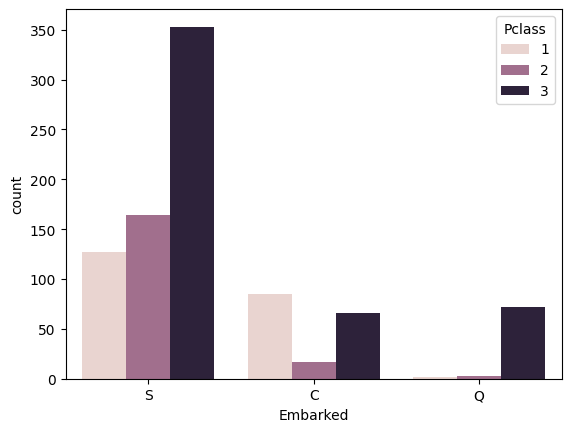

In [ ]:
sns.countplot(x='Embarked', hue='Pclass', data=train_data)

# 特徴量抽出に係るヘルパー関数の作成

## 名前の長さと敬称の特徴量抽出

In [ ]:
def names(train_data, test_data):
    for i in [train_data, test_data]:
        i['Name_Len'] = i['Name'].apply(lambda x: len(x))
        i['Name_Status'] = i['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
        del i['Name']
    return train_data, test_data

## 年齢の欠損値の補完

In [ ]:
def age_impute(train_data, test_data):
    # 共通処理：特徴量の選択とワンホットエンコーディング
    age_train_df = train_data[['Age', 'Pclass', 'Sex', 'Parch', 'SibSp']]
    age_test_df = test_data[['Age', 'Pclass', 'Sex', 'Parch', 'SibSp']]
    age_train_df = pd.get_dummies(age_train_df)
    age_test_df = pd.get_dummies(age_test_df)

    # トレーニングデータの既知の年齢でモデルをトレーニング
    known_age = age_train_df[age_train_df.Age.notnull()].values
    X = known_age[:, 1:]
    y = known_age[:, 0]
    rfr = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
    rfr.fit(X, y)

    # トレーニングデータの未知の年齢を予測
    unknown_age_train = age_train_df[age_train_df.Age.isnull()].values
    predictedAges_train = rfr.predict(unknown_age_train[:, 1:])
    train_data.loc[train_data.Age.isnull(), 'Age'] = predictedAges_train

    # テストデータの未知の年齢を予測
    unknown_age_test = age_test_df[age_test_df.Age.isnull()].values
    predictedAges_test = rfr.predict(unknown_age_test[:, 1:])
    test_data.loc[test_data.Age.isnull(), 'Age'] = predictedAges_test

    return train_data, test_data

## 家族サイズ特徴量の計算

In [ ]:
def fam_size(train_data, test_data):
    for i in [train_data, test_data]:
        i['Fam_Size'] = np.where((i['SibSp']+i['Parch']) == 0 , 'Solo',
                           np.where((i['SibSp']+i['Parch']) <= 3,'Nuclear', 'Big'))
        del i['SibSp']
        del i['Parch']
    return train_data, test_data

## チケット文字列の処理

In [ ]:
def ticket_grouped(train_data, test_data):
    for i in [train_data, test_data]:
        i['Ticket_Lett'] = i['Ticket'].apply(lambda x: str(x)[0])
        i['Ticket_Lett'] = i['Ticket_Lett'].apply(lambda x: str(x))
        i['Ticket_Lett'] = np.where((i['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), i['Ticket_Lett'],
                                   np.where((i['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            'Low_ticket', 'Other_ticket'))
        i['Ticket_Len'] = i['Ticket'].apply(lambda x: len(x))
        del i['Ticket']
    return train_data, test_data

## 客室情報の処理 -最初の文字

In [ ]:
def cabin(train_data, test_data):
    for i in [train_data, test_data]:
        i['Cabin_Letter'] = i['Cabin'].apply(lambda x: str(x)[0])
        del i['Cabin']
    return train_data, test_data

## 客室情報の処理 -客室番号

In [ ]:
def cabin_num(train_data, test_data):
    for i in [train_data, test_data]:
        i['Cabin_num1'] = i['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
        i['Cabin_num1'].replace('an', np.NaN, inplace = True)
        i['Cabin_num1'] = i['Cabin_num1'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)
        i['Cabin_num'] = pd.qcut(train_data['Cabin_num1'],3)
    train_data = pd.concat((train_data, pd.get_dummies(train_data['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    test_data = pd.concat((test_data, pd.get_dummies(test_data['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    del train_data['Cabin_num']
    del test_data['Cabin_num']
    del train_data['Cabin_num1']
    del test_data['Cabin_num1']
    return train_data, test_data

## Embarked列の欠損値処理

In [ ]:
def embarked_impute(train_data, test_data):
    for i in [train_data, test_data]:
        i['Embarked'] = i['Embarked'].fillna('S')
    return train_data, test_data

## Fare 列の欠損値の処理

In [ ]:
test_data['Fare'].fillna(train_data['Fare'].mean(), inplace = True)

## ダミー変数への変換

In [ ]:
def dummies(train_data, test_data, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett', 'Cabin_Letter', 'Name_Status', 'Fam_Size']):
    for column in columns:
        train_data[column] = train_data[column].apply(lambda x: str(x))
        test_data[column] = test_data[column].apply(lambda x: str(x))
        good_cols = [column+'_'+i for i in train_data[column].unique() if i in test_data[column].unique()]
        train_data = pd.concat((train_data, pd.get_dummies(train_data[column], prefix = column)[good_cols]), axis = 1)
        test_data = pd.concat((test_data, pd.get_dummies(test_data[column], prefix = column)[good_cols]), axis = 1)
        del train_data[column]
        del test_data[column]
    return train_data, test_data

## 不要なカラムの削除

In [ ]:
def drop(train_data, test_data, bye = ['PassengerId']):
    for i in [train_data, test_data]:
        for z in bye:
            del i[z]
    return train_data, test_data

## モデルで使用するデータセットの整理

In [ ]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')
train_data, test_data = names(train_data, test_data)
train_data, test_data = age_impute(train_data, test_data)
train_data, test_data = cabin_num(train_data, test_data)
train_data, test_data = cabin(train_data, test_data)
train_data, test_data = embarked_impute(train_data, test_data)
train_data, test_data = fam_size(train_data, test_data)
test_data['Fare'].fillna(train_data['Fare'].mean(), inplace = True)
train_data, test_data = ticket_grouped(train_data, test_data)
train_data, test_data = dummies(train_data, test_data, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett',
                                                                     'Cabin_Letter', 'Name_Status', 'Fam_Size'])
train_data, test_data = drop(train_data, test_data)

In [ ]:
print(len(train_data.columns))

44


## ハイパーパラメータのチューニング + モデルの推定と評価

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini',
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train_data.iloc[:, 1:], train_data.iloc[:, 0])
print("%.4f" % rf.oob_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.8373


## 変数の重要度確認

In [ ]:
pd.concat((pd.DataFrame(train_data.iloc[:, 1:].columns, columns = ['variable']),
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])),
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
32,Name_Status_Mr.,0.114965
10,Sex_male,0.112851
11,Sex_female,0.104882
1,Fare,0.092890
2,Name_Len,0.089007
0,Age,0.083045
7,Pclass_3,0.044586
6,Ticket_Len,0.031241
34,Name_Status_Miss.,0.028963
24,Cabin_Letter_n,0.028778


In [ ]:
predictions = rf.predict(test_data)
predictions = pd.DataFrame(predictions, columns=['Survived'])
test_data = pd.read_csv('/content/test.csv')
predictions = pd.concat((test_data.iloc[:, 0], predictions), axis = 1)
predictions.to_csv('submisson.csv', sep=",", index = False)